# Sky Image Classification Project

 implements three different models to classify sky images as either clear ('s') or cloudy ('c') using various image processing techniques.

In [ ]:

import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


# Required Libraries

Importing essential libraries:
- `cv2`: For image processing operations
- `numpy`: For numerical computations
- `sklearn.metrics`: For evaluating model performance

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Function to extract features (Blue Mean and Red Mean)
def extract_color_means(image_path):
    # 1. Read the image
    img = cv2.imread(image_path)

    if img is None:
        return None, None

    # 2. Split the channels (BGR)
    b, g, r = cv2.split(img)

    # 3. Calculate the mean of blue and red channels
    blue_mean = np.mean(b)
    red_mean = np.mean(r)

    return blue_mean, red_mean

# Example:
# blue_feature, red_feature = extract_color_means('path/to/your/image.jpg')

# Feature Extraction Function

Defines a function to extract color features from images:
- Reads an image using OpenCV
- Extracts blue and red channel information
- Calculates mean values for classification

# Model 1

In [ ]:
# Classification function by checking two channels
def model_1(blue_mean, red_mean, T_blue=90, T_red=110):

    # Set thresholds: T_blue for blue sky, T_red for sunset/sunrise sky.
    # You should set T_red slightly higher than T_blue based on your data.

    # 1. Condition for clear blue sky
    is_clear_blue = blue_mean > T_blue

    # 2. Condition for clear sunset/sunrise sky
    is_clear_sunset = red_mean > T_red


    # If either of the clear sky conditions is met, classify the image as 'c' (clear).
    if is_clear_blue or is_clear_sunset:
        return 's' # Clear Sky
    else:
        return 'c' # Cloudy Sky

# Model 1: Basic Color Thresholding

Simple classification model that uses:
- Blue channel mean for detecting clear blue skies
- Red channel mean for detecting sunrise/sunset
- Basic thresholding approach

In [ ]:
import os


# ⚠️ Main folder path containing your images
# If you are in VS Code, enter the local path (e.g., 'data/dataset_images')
# If you are in Colab, if you are using Drive: '/content/drive/MyDrive/dataset_images'
DATA_DIR = "E:\\UT\\semester 7\\Machine learning\\HW#1\\q9\\Images"

# Final list to store information: [(full image path, actual label)]
dataset_info = []

# 1. Iterate through the image folder
for filename in os.listdir(DATA_DIR):
    # Ensure the file is an image (instead of system files like .DS_Store)
    if filename.endswith(('.jpg', '.jpeg', '.png')):

        # 2. Extract the actual label (s or c)
        # Filenames are in the format 's1.jpg' or 'c40.jpg'. The first letter is our label.
        label = filename[0]

        # 3. Construct the full file path
        full_path = os.path.join(DATA_DIR, filename)

        # 4. Store the path and label in the list
        dataset_info.append((full_path, label))

# Print a few samples to confirm
print(f"Total images found: {len(dataset_info)}")
print("--- First 10 samples from the dataset ---")
for i in range(min(10, len(dataset_info))):
    print(f"Path: {dataset_info[i][0]}، Label: {dataset_info[i][1]}")

Total images found: 80
--- First 10 samples from the dataset ---
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c1.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c10.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c11.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c12.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c13.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c14.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c15.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c16.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c17.jpg، Label: c
Path: E:\UT\semester 7\Machine learning\HW#1\q9\Images\c18.jpg، Label: c


# Data Loading

Loading and organizing the image dataset:
- Reads images from specified directory
- Extracts labels from filenames
- Creates dataset with image paths and labels

In [ ]:
# Variables to store results
actual_labels = []
predicted_labels = []

# dataset_info is a list that holds paths and labels.
for image_path, actual_label in dataset_info:

    # 1. Extract the two new features
    blue_mean, red_mean = extract_color_means(image_path)

    if blue_mean is not None:
        # 2. Apply the new classification rule
        prediction = model_1(blue_mean, red_mean, T_blue=150, T_red=180)

        # 3. Store the results
        actual_labels.append(actual_label)
        predicted_labels.append(prediction)

# Then continue: Calculate Confusion Matrix and metrics using actual_labels and predicted_labels

# Model 1 Evaluation

Applying Model 1 to the dataset:
- Extracts features from each image
- Makes predictions using the model
- Collects actual and predicted labels for evaluation

In [ ]:
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[35  5]
 [31  9]]
Precision: 0.59
Recall: 0.55
Accuracy: 0.55


# Performance Metrics - Model 1

Calculating and displaying performance metrics:
- Confusion Matrix: Shows prediction distribution
- Precision: Accuracy of positive predictions
- Recall: Ability to find all positive cases
- Accuracy: Overall correct predictions

In [ ]:
pip install  seaborn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 3.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 2.7 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.0 MB 2.8 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 2.8 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.0 MB 2.1 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.0 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 2.7 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 2.2 MB/s eta 0:00:04
   ----------------- ---------------------- 4.7/11.0 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 5.2/11.0 MB 2.4 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.0 MB 2.4 MB/s eta 0:00:03
   ---

# Visualization Setup

Installing seaborn library for enhanced visualization:
- Used for creating confusion matrix heatmap
- Provides better visual representation of results

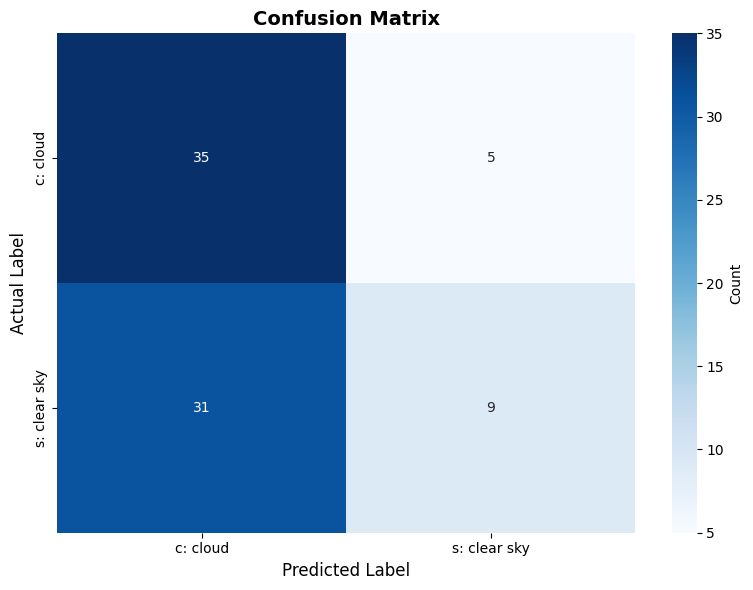

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have actual_labels and predicted_labels defined
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Create figure
plt.figure(figsize=(8, 6))

# Define labels
labels = ['c: cloud', 's: clear sky']

# Plot confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Count'},
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()

# Model 2: Enhanced Feature Extraction

Improved model with additional features:
- Includes blue channel standard deviation
- Calculates blue-to-red ratio
- Better handling of edge cases

In [ ]:
# Function to extract improved color features
def extract_color_features(image_path):
    img = cv2.imread(image_path)

    if img is None:
        return None, None, None, None

    b, g, r = cv2.split(img)

    # Mean values
    blue_mean = np.mean(b)
    red_mean = np.mean(r)

    # Standard deviation (clouds = more variation)
    blue_std = np.std(b)

    # Blue-to-Red ratio (clear sky = higher ratio)
    br_ratio = blue_mean / (red_mean + 1e-6)

    return blue_mean, red_mean, blue_std, br_ratio


In [ ]:
def classify_sky_improved(blue_mean, red_mean, blue_std, br_ratio,
                          T_blue=150, T_red=180, T_std=45, T_ratio=0.95):
    """
    T_blue: Blue mean threshold for clear sky
    T_red: Red mean threshold for sunrise/sunset
    T_std: Standard deviation threshold (cloudy = higher std)
    T_ratio: Blue/Red ratio threshold (clear = higher ratio) -> Rayleigh scattering

    """

    # Condition 1: Clear blue sky
    is_clear_blue = (blue_mean > T_blue) and (br_ratio > T_ratio)

    # Condition 2: Clear sunrise/sunset sky
    is_clear_sunset = (red_mean > T_red) and (blue_std < T_std)

    # Condition 3: Cloudy (high std = high variation)
    is_cloudy = blue_std > T_std

    if (is_clear_blue or is_clear_sunset) and not is_cloudy:
        return 's'  # Clear Sky
    else:
        return 'c'  # Cloudy



In [ ]:
actual_labels = []
predicted_labels = []

for image_path, actual_label in dataset_info:
    blue_mean, red_mean, blue_std, br_ratio = extract_color_features(image_path)

    if blue_mean is not None:
        prediction = classify_sky_improved(blue_mean, red_mean, blue_std, br_ratio,
                                          T_blue=150, T_red=180, T_std=45, T_ratio=0.95)

        actual_labels.append(actual_label)
        predicted_labels.append(prediction)

# Evaluation
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[38  2]
 [33  7]]
Precision: 0.66
Recall: 0.56
Accuracy: 0.56


# Model 3: Advanced Feature Analysis

Most sophisticated model incorporating:
- Blue/Red means and ratios
- Standard deviation analysis
- HSV color space features (saturation)
- Combined thresholding approach

In [ ]:
# Function to extract improved color features
def extract_color_features(image_path):
    img = cv2.imread(image_path)

    if img is None:
        return None, None, None, None, None

    b, g, r = cv2.split(img)

    # Mean values
    blue_mean = np.mean(b)
    red_mean = np.mean(r)

    # Standard deviation (clouds = more variation)
    blue_std = np.std(b)

    # Blue-to-Red ratio (clear sky = higher ratio)
    br_ratio = blue_mean / (red_mean + 1e-6)

    # Saturation (clear sky = higher saturation)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    saturation_mean = np.mean(hsv[:, :, 1])

    return blue_mean, red_mean, blue_std, br_ratio, saturation_mean


# Improved classification function
def classify_sky_improved(blue_mean, red_mean, blue_std, br_ratio, saturation_mean,
                          T_blue=130, T_red=150, T_std=60, T_ratio=1.4, T_sat=50):
    """
    T_blue: Blue mean threshold for clear sky
    T_red: Red mean threshold for sunrise/sunset
    T_std: Standard deviation threshold (cloudy = higher std)
    T_ratio: Blue/Red ratio threshold (clear = higher ratio)
    T_sat: Saturation threshold (clear sky = higher saturation)
    """

    # Condition 1: Clear blue sky
    is_clear_blue = (blue_mean > T_blue) and (br_ratio > T_ratio) and (saturation_mean > T_sat)

    # Condition 2: Clear sunrise/sunset sky
    is_clear_sunset = (red_mean > T_red) and (blue_std < T_std)

    # Condition 3: Cloudy (high std = high variation OR low saturation)
    is_cloudy = (blue_std > T_std) or (saturation_mean < T_sat)

    if (is_clear_blue or is_clear_sunset) and not is_cloudy:
        return 's'  # Clear Sky
    else:
        return 'c'  # Cloudy


# Example usage:
# For each image in dataset
actual_labels = []
predicted_labels = []

for image_path, actual_label in dataset_info:
    blue_mean, red_mean, blue_std, br_ratio, saturation_mean = extract_color_features(image_path)

    if blue_mean is not None:
        prediction = classify_sky_improved(blue_mean, red_mean, blue_std, br_ratio, saturation_mean,
                                          T_blue=130, T_red=150, T_std=60, T_ratio=1.4, T_sat=50)

        actual_labels.append(actual_label)
        predicted_labels.append(prediction)

# Evaluation
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[35  5]
 [22 18]]
Precision: 0.70
Recall: 0.66
Accuracy: 0.66
